In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as mn

In [2]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

C:\Users\Manish\AppData\Local\Temp\ipykernel_21156\1657760563.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [6]:
train = pd.read_csv(r"C:\Documents\Documents\Germany\1SRH\Thesis\Dataset\KDDTrain+.txt", names = columns)
test = pd.read_csv(r"C:\Documents\Documents\Germany\1SRH\Thesis\Dataset\KDDTest+.txt", names = columns)

# Dataset Features

In [5]:
columns = np.array(["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", 
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
          "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", 
           "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
          "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
          "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
          "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
          "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "class", "score"])

In [7]:
train.columns=columns
test.columns=columns

In [8]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,score
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [9]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,score
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [10]:
train.info() #Basic information about train_df along with its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
train.isnull().sum() #Checking missing data in train_df DataFrame

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

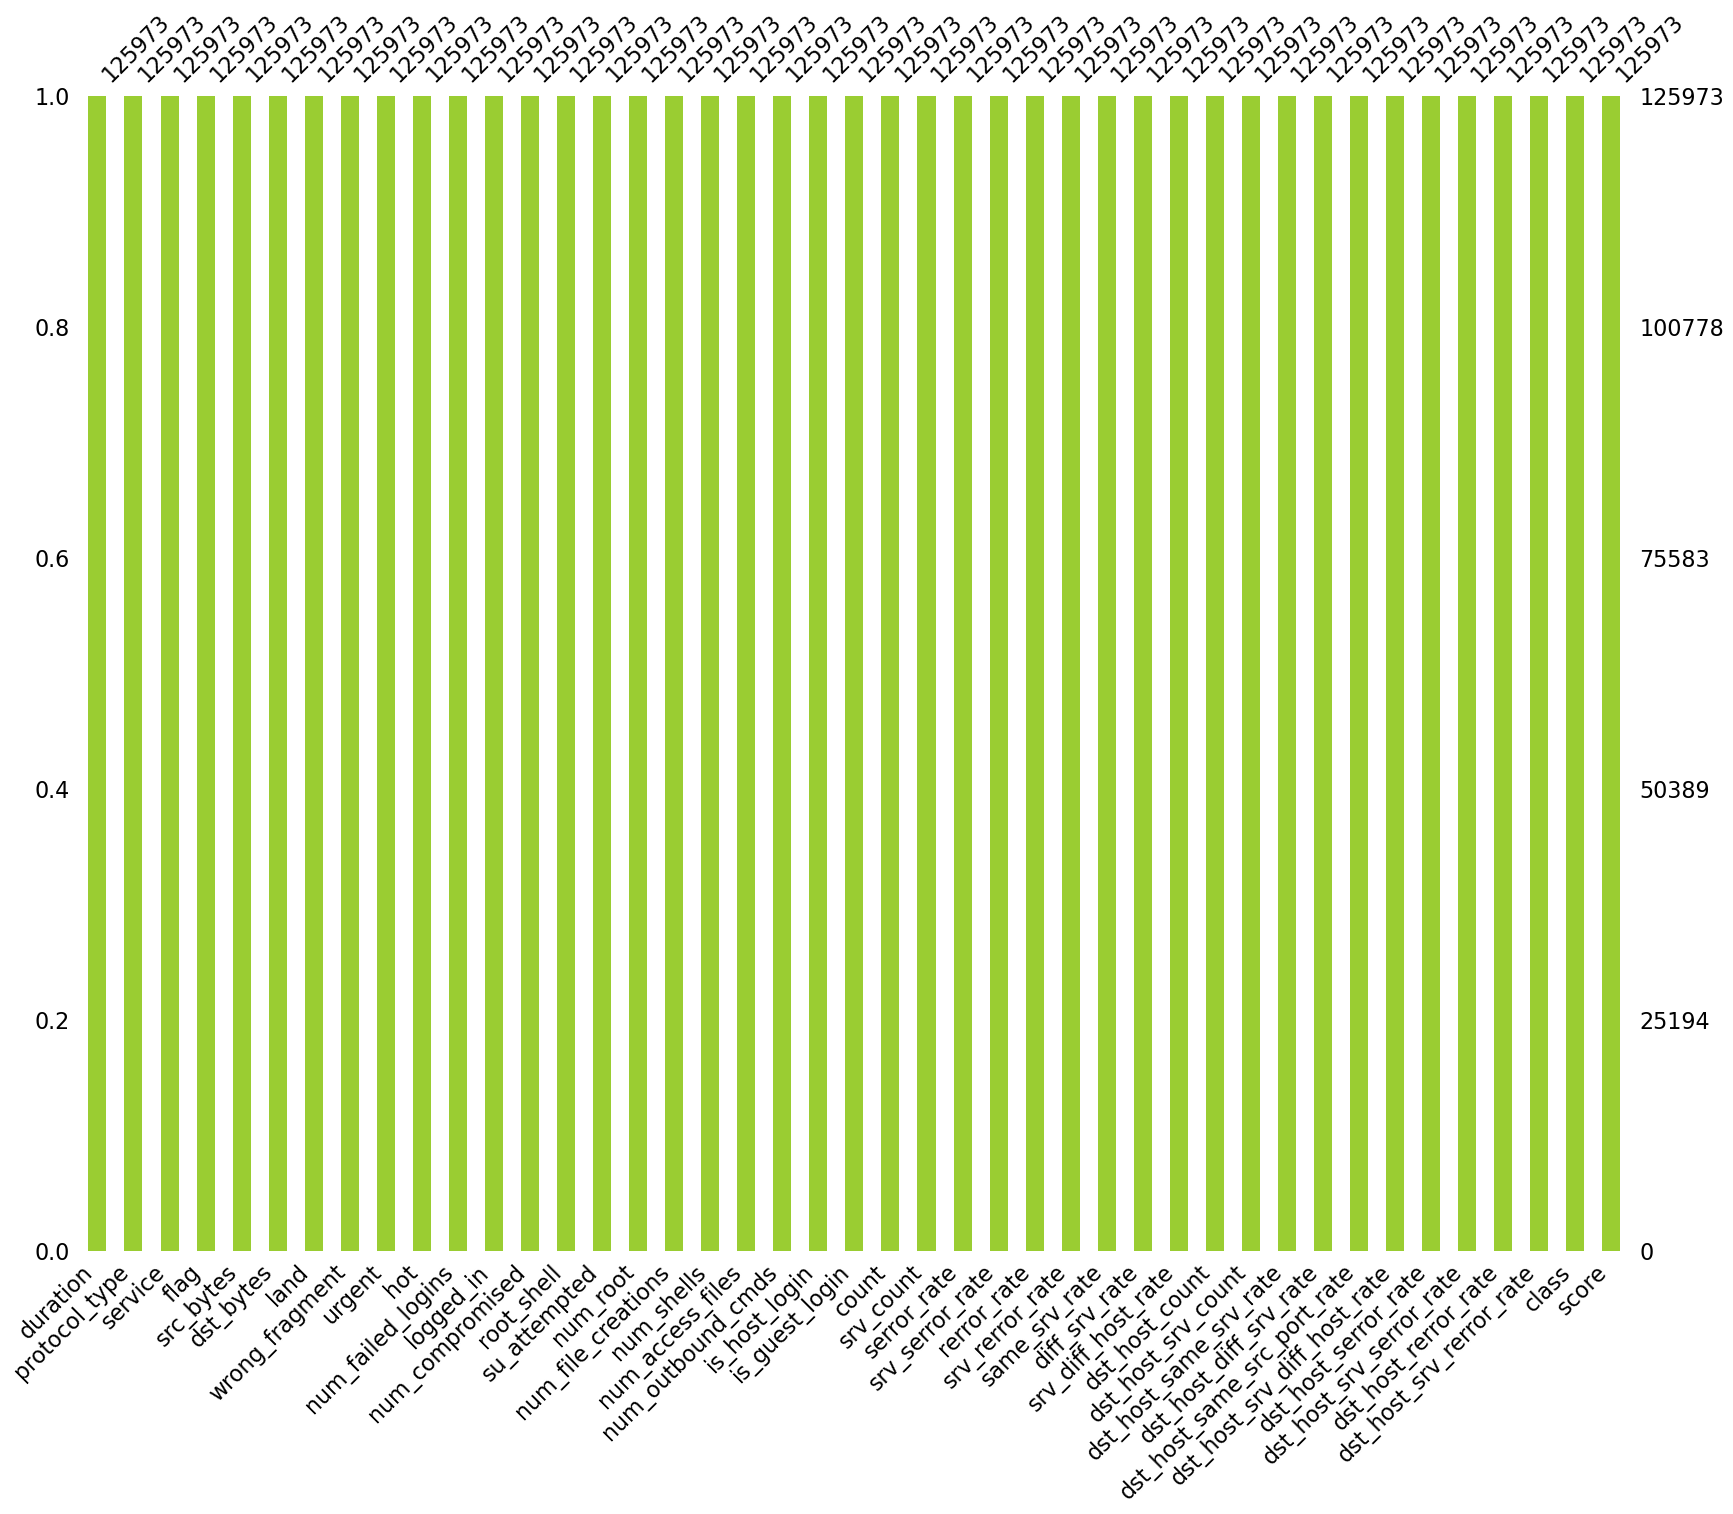

In [12]:
mn.bar(train, color = 'yellowgreen', figsize = (20,15)) # no missing data found in training dataset

In [13]:
train['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [14]:
train['score'].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

In [15]:
classLabel_counts = train.groupby(['class']).size() #class label data sizes in dataset
classLabel_counts

class
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

In [18]:
per_classLabels = classLabel_counts/train.shape[0]*100 #Feature "class" labels percentage with respect to size of train_df (i.e. 125973)
per_classLabels

class
back                0.758893
buffer_overflow     0.023815
ftp_write           0.006351
guess_passwd        0.042073
imap                0.008732
ipsweep             2.856961
land                0.014289
loadmodule          0.007144
multihop            0.005557
neptune            32.716534
nmap                1.185175
normal             53.458281
perl                0.002381
phf                 0.003175
pod                 0.159558
portsweep           2.326689
rootkit             0.007938
satan               2.883951
smurf               2.100450
spy                 0.001588
teardrop            0.708088
warezclient         0.706501
warezmaster         0.015876
dtype: float64

C:\Users\Manish\AppData\Local\Temp\ipykernel_21156\3695219514.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(classLabel_counts.index, rotation = 45)


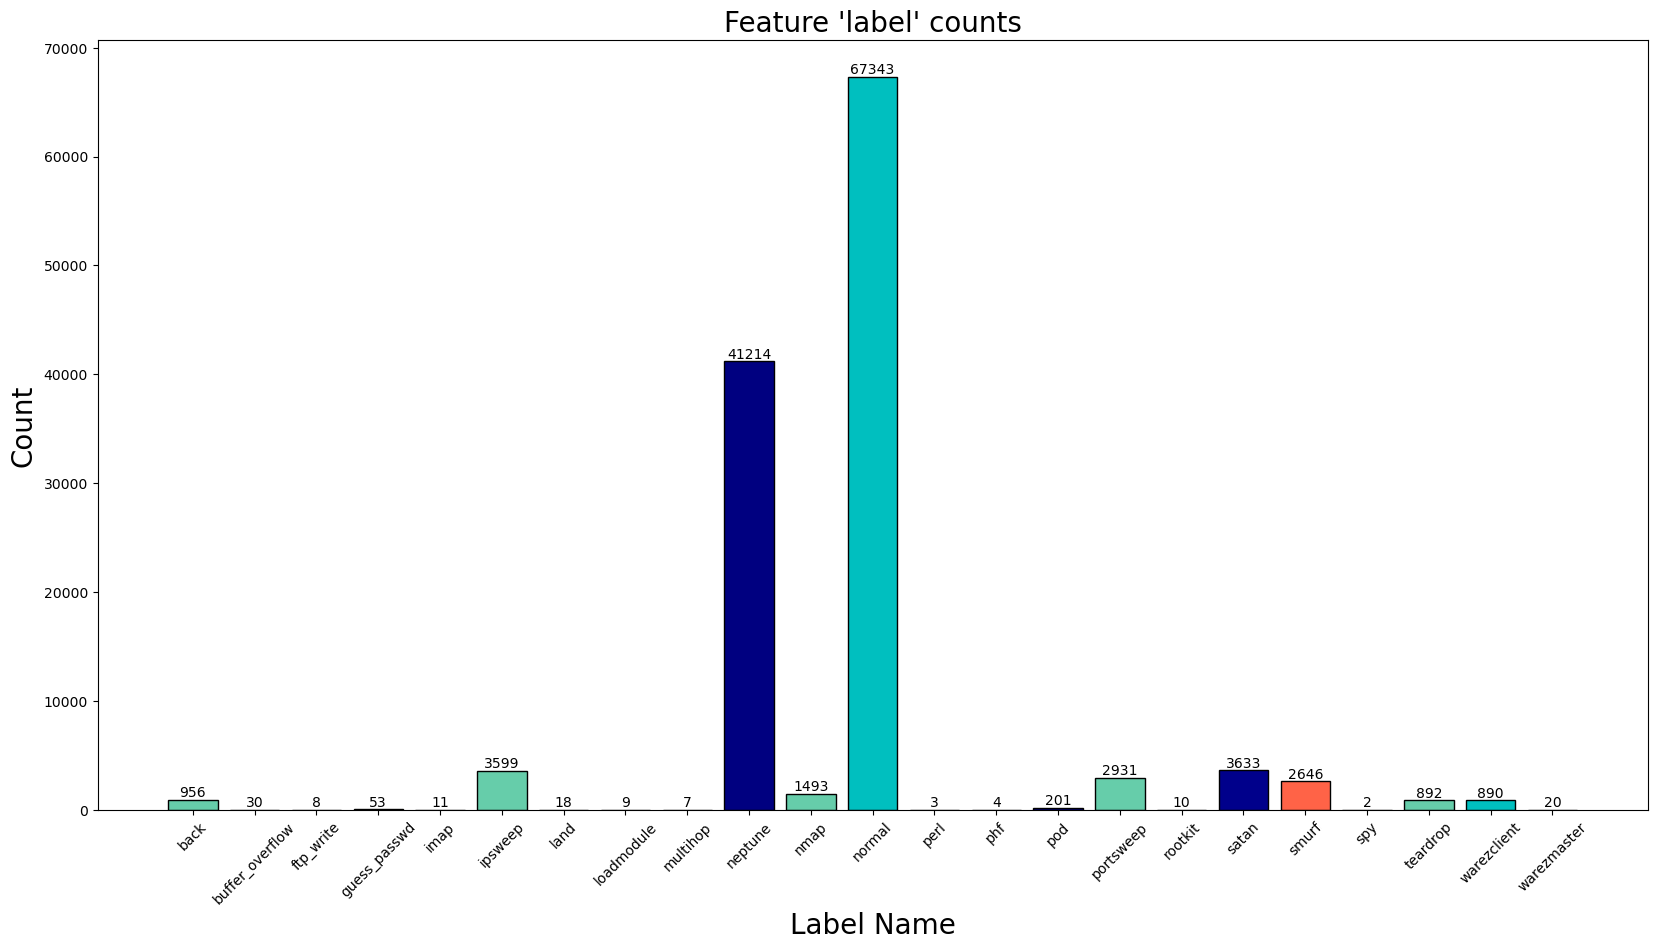

In [18]:
fig = plt.figure(figsize = (20,10))
r_ = [round(each, 2) for each in classLabel_counts.values]
ax = fig.add_subplot(111)
ax.bar(classLabel_counts.index, classLabel_counts.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')
ax.set_xticklabels(classLabel_counts.index, rotation = 45)
ax.set_xlabel("Label Name", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Feature 'label' counts", fontsize = 20)

for i in range(len(classLabel_counts.values)):
    plt.annotate(str(r_[i]), xy=(classLabel_counts.index[i],r_[i]+1), ha='center', va='bottom')

In [22]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

In [24]:
train['attack_type'] = train['class'].apply(encode_attack)
train.iloc[:10, -5:]
#Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,score,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


In [25]:
#Different attack types data sizes
train.groupby('attack_type').size()

attack_type
Dos       45927
Probe     11656
R2L         995
U2R          52
normal    67343
dtype: int64

In [27]:
#Percentage of data hold by different attack types
percent_data = (train.groupby('attack_type').size())/train.shape[0] * 100
percent_data

attack_type
Dos       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
normal    53.458281
dtype: float64

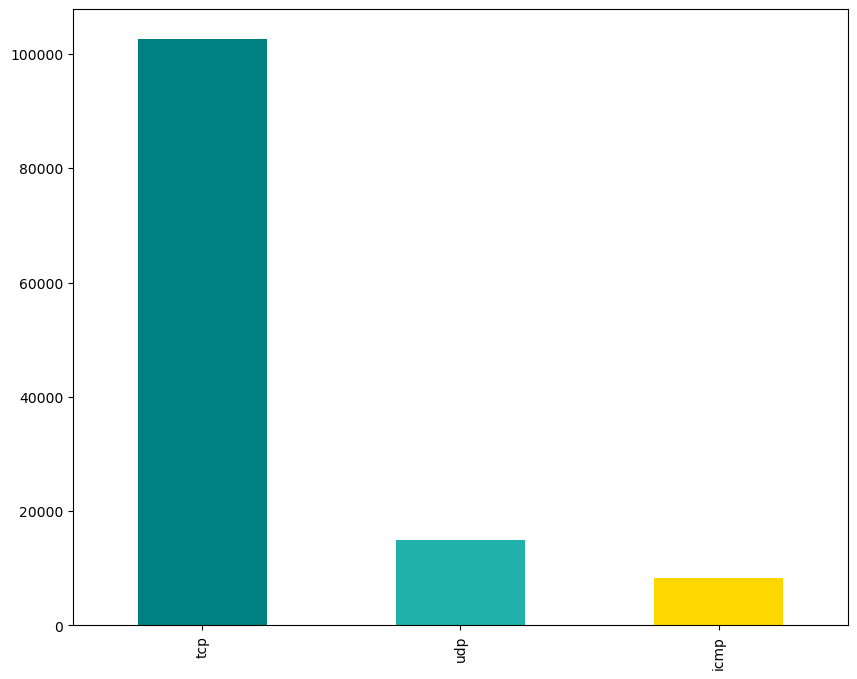

In [29]:
#Di9fferent protocol types
plt.subplots(figsize=(10,8))
train['protocol_type'].value_counts(normalize = True)
train['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

In [ ]:
#Different types of services in data
plt.subplots(figsize=(25,16))
train.value_counts(normalize = True)
train.value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()
#In the dataset, "http" requests are high in nature when compared to "private" 
#which is approximately half of "http" requests. Rest of all requests are hold 0 to 10% of whole data. 

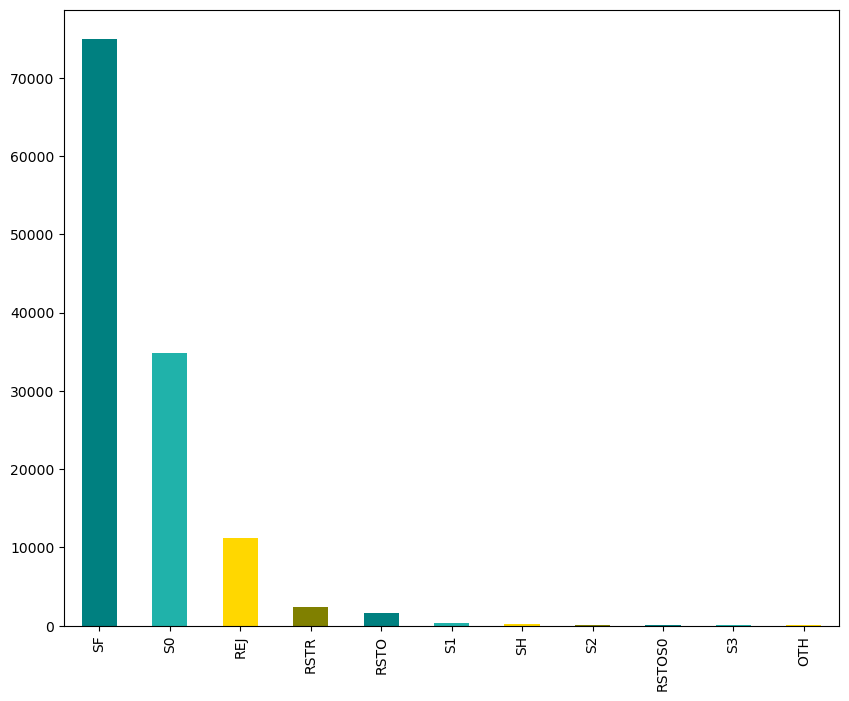

In [34]:
#Different types of flags in the data
plt.subplots(figsize=(10,8))
train['flag'].value_counts(normalize = True)
train['flag'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()